# Seminar 16 - Combinatorics, Graph, Boolean Logic

## Random Networks

## HW 11

Please, fill in before you start:

First Name: Julia

Last Name: Mikhailova

Group: 218

### After the assigment is done, please, push it to your [private GitHub repository](https://docs.github.com/en/github/administering-a-repository/managing-repository-settings/setting-repository-visibility) and invite [Majid-Sohrabi](https://github.com/Majid-Sohrabi)  and [Sifei-Meng](https://github.com/mengsifei) as [collaborator](https://docs.github.com/en/account-and-profile/setting-up-and-managing-your-github-user-account/managing-access-to-your-personal-repositories/inviting-collaborators-to-a-personal-repository).

Complete all task and send the notebook as HW.


- Please create a private GitHub repository and add Majid and Sifei as collaborator. Commit your solution (jupyter notebook) to your github repository.

- Deadline: **May 24, 2024, 11:59 pm**.

- Please keep the file name but replace **YOUR_NAME** part by your name: **[HW11_Combinatorics]-YOUR_NAME**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from zlib import adler32
import requests
import networkx as nx
from tqdm.notebook import tqdm
import scipy.stats as st

### Task 1. Erdos Renyi model (1 point)

Implement Erdos Renyi model (random graph) — each pair of $n$ nodes are connected with some fixed probability $p$.

In [4]:
def erdos_renyi_graph(n, p):
    G = nx.Graph()
    nodes = np.arange(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_edges(nodes, p))
    return G

Write a function `random_edges` with parameters: `nodes` — np.array of nodes, for example [1, 2, 3, 4, ...] and `p` — probability of connection. The function returns np.array with tuples of the form [(1, 2), (2, 4), ...], where 1-2, 2-4 are edges that should be added in the graph.

*Hint: To speed up the generation, look at ALG.1 in the article [Efficient generation of large random networks](http://vlado.fmf.uni-lj.si/pub/networks/doc/ms/rndgen.pdf).*

In [2]:
def random_edges(nodes, p):
    edges = []
    num_nodes = len(nodes)

    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if np.random.rand() < p:
                edges.append((nodes[i], nodes[j]))

    return np.array(edges)

In [5]:
'''Check the Erdos-Renyi random graph generation'''
assert len(erdos_renyi_graph(100, 0.1).edges) > 0
n = 100
p = 0.4
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma
n = 1000
p = 0.01
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma
n = 300
p = 0.9
n_edges = n * (n-1) / 2
q = 1 - p
sigma = np.sqrt((p * q) / n_edges)
assert  p - 3*sigma < random_edges(np.arange(n), p).shape[0] / n_edges < p + 3*sigma

Let us draw a couple of generated graphs

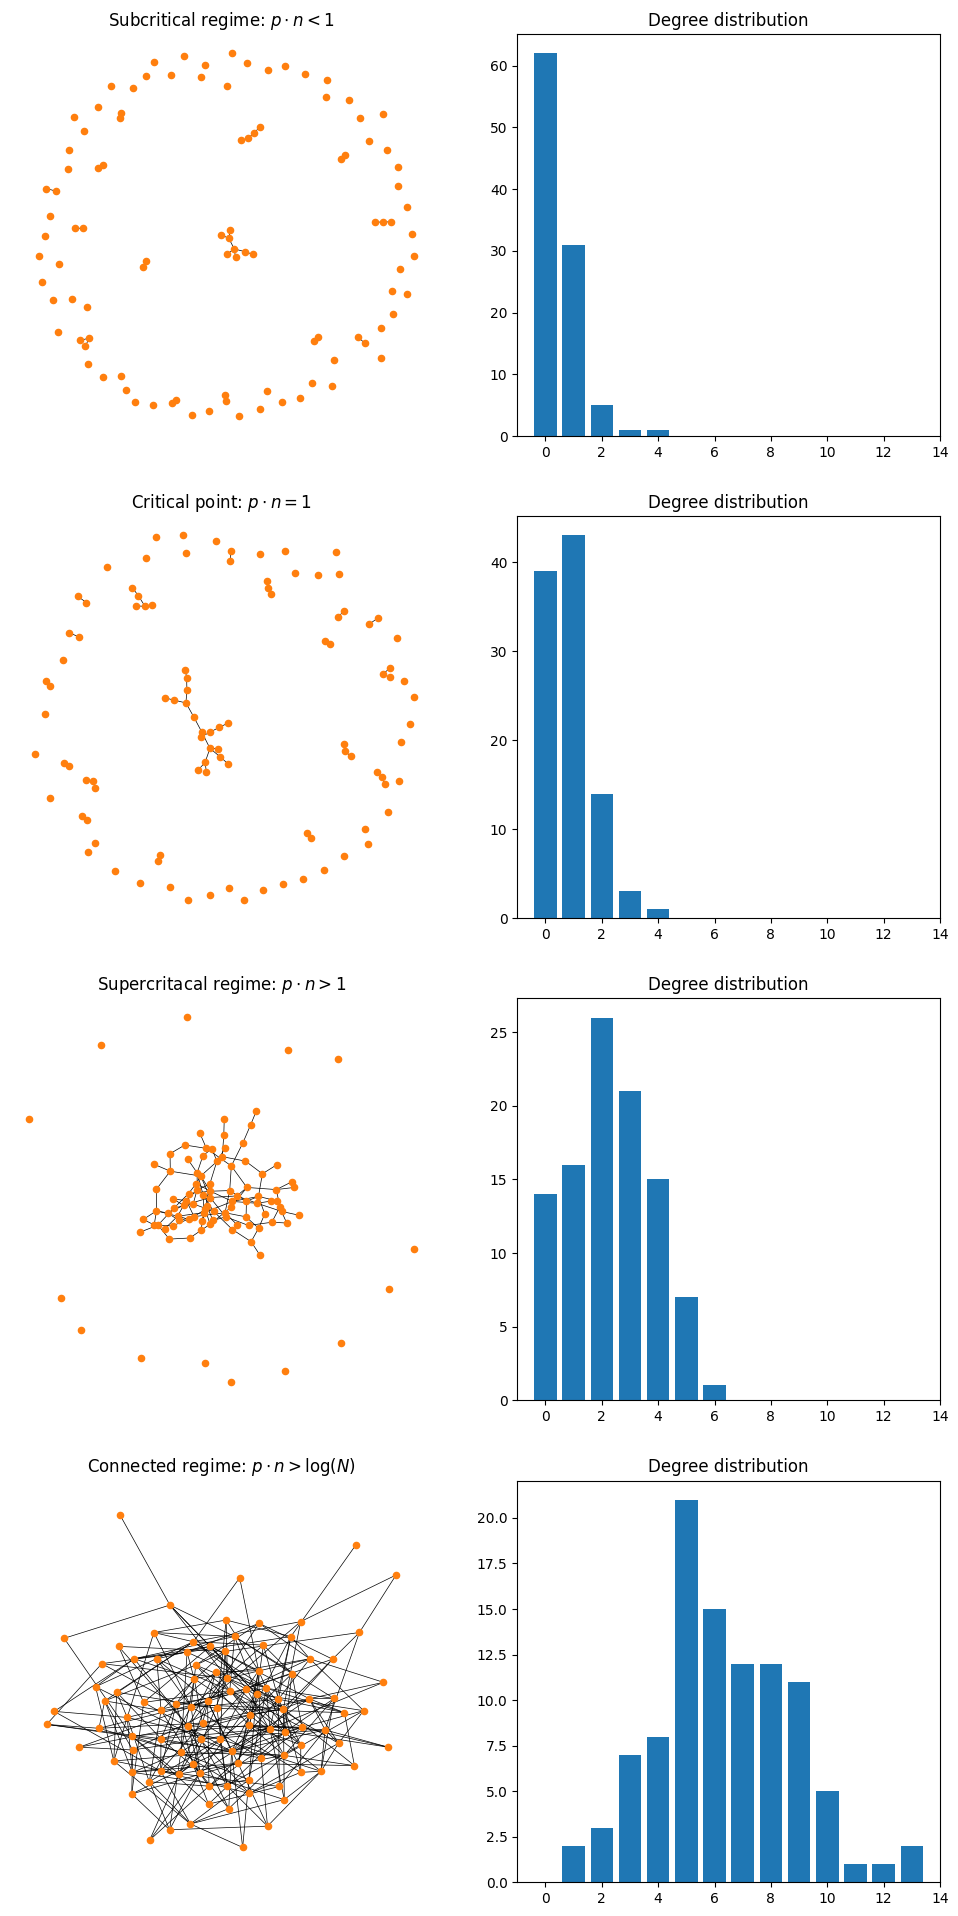

In [6]:
n = 100
cases = [('Subcritical regime: $p \cdot n < 1$', n, 0.5/n),
         ('Critical point: $p \cdot n = 1$', n, 1/n),
         ('Supercritacal regime: $p \cdot n > 1$', n, 2/n),
         ('Connected regime: $p \cdot n > \log(N)$', n, 6.5/n)]
plt.figure(figsize=(12, 6 * 4))
i = 1
for regime, n, p in cases:
    plt.subplot(4, 2, i)
    G = erdos_renyi_graph(n, p)
    nx.draw(
        G,
        with_labels=False,
        node_size=20,
        width=0.5,
        node_color='tab:orange')
    plt.title(regime)
    i += 1
    plt.subplot(4, 2, i)
    degree_seq = [degree for (node, degree) in G.degree]
    bins, freq = np.unique(degree_seq, return_counts=True)
    plt.bar(bins, freq)
    plt.xlim((-1, 14))
    plt.title('Degree distribution')
    i += 1

### Task 2. Degree distribution of random vs real networks (1 point)

In [7]:
url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/wiki_vote.txt'
open('wiki_vote.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/facebook_combined.txt'
open('facebook_combined.txt', 'wb').write(requests.get(url).content)

url = 'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/collaboration_network_of_arxiv_general_relativity_category.txt'
open('collaboration_network_of_arxiv_general_relativity_category.txt', 'wb').write(requests.get(url).content);

Let us compare degree distributions of real and random networks and decide whether they are close or not.

Write a function `random_from_real` that takes a graph and returns a random network that has the same average node degree and the same number of nodes as a given network.

In [12]:
def random_from_real(graph):
    n = graph.number_of_nodes()
    avg_degree = np.mean([degree for _, degree in graph.degree()])
    p = avg_degree / (n - 1)
    random_graph = nx.erdos_renyi_graph(n, p)

    return random_graph

In [9]:
for file in ['wiki_vote.txt',
             'collaboration_network_of_arxiv_general_relativity_category.txt',
             'facebook_combined.txt']:
    real_net = nx.read_edgelist(file)
    random_net = random_from_real(real_net)
    av_degree_random = np.mean(list(dict(random_net.degree).values()))
    av_degree_real = np.mean(list(dict(real_net.degree).values()))

In [10]:
for file in ['wiki_vote.txt',
             'collaboration_network_of_arxiv_general_relativity_category.txt',
             'facebook_combined.txt']:
    real_net = nx.read_edgelist(file)
    random_net = random_from_real(real_net)
    av_degree_random = np.mean(list(dict(random_net.degree).values()))
    av_degree_real = np.mean(list(dict(real_net.degree).values()))
    assert len(random_net) == len(real_net)
    assert np.abs(av_degree_random - av_degree_real) < 1.2

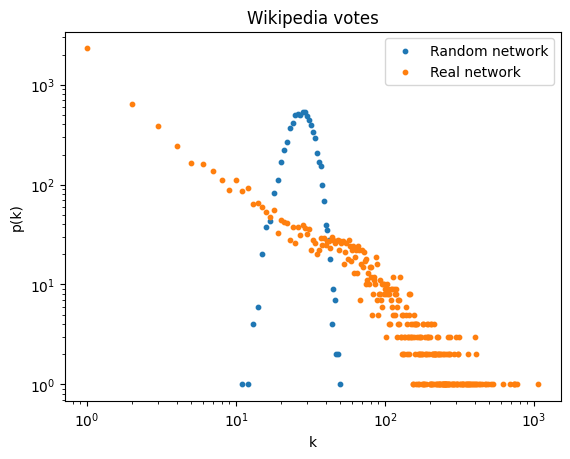

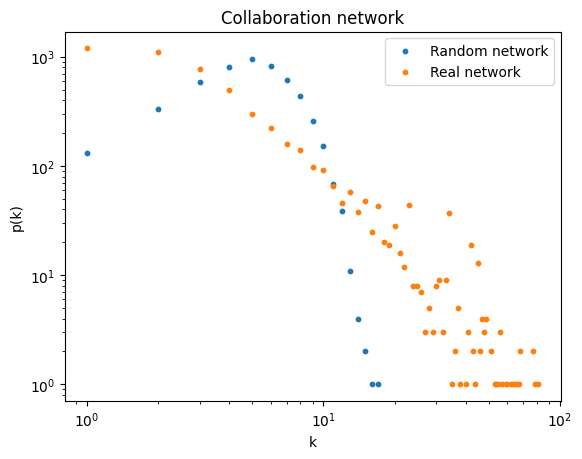

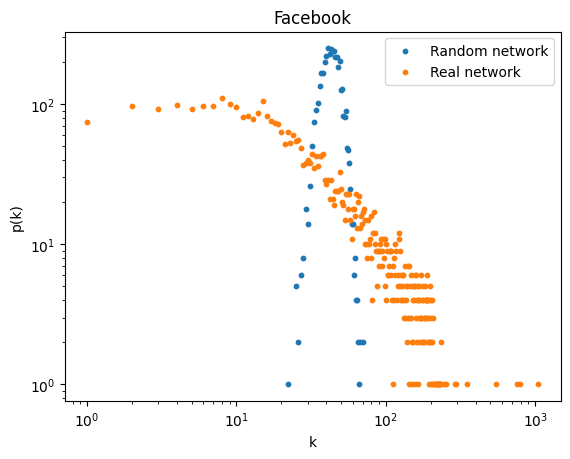

In [11]:
cases = [['Wikipedia votes', 'wiki_vote.txt'],
         ['Collaboration network', 'collaboration_network_of_arxiv_general_relativity_category.txt'],
         ['Facebook', 'facebook_combined.txt']]
for title, file in cases:
    real_net = nx.read_edgelist(file)
    random_net = random_from_real(real_net)
    degree_hist = np.array(nx.degree_histogram(random_net))
    idx = np.argwhere(degree_hist > 0)
    plt.scatter(idx, degree_hist[idx], s=10, label='Random network')
    degree_hist = np.array(nx.degree_histogram(real_net))
    idx = np.argwhere(degree_hist > 0)
    plt.scatter(idx, degree_hist[idx], s=10, label='Real network')
    plt.legend()
    plt.xlabel('k')
    plt.ylabel('p(k)')
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()

Real graph is poorly described by random graph. Becasue Erdos Renyi model does not contain scale free network. But in real world graph we have scale free network.

### Task 3. Component sizes (2 points)  -- FOR HW

Let us see how the size of small components (small — not giant) depends on the probability near the critical point: $p =1/n$.

Write a function `small_component_size` with parameters `n` — number of nodes, `probabilities` — np.array of probabilities. The function generates a random graph for each probability and returns np.array of average sizes of small components.

*Hint: to find nodes in components, use `nx.connected_components(graph)`*

In [15]:
def small_component_size(n, probabilities):
    avg_small_component_sizes = []

    for p in probabilities:
        G = nx.erdos_renyi_graph(n, p)
        components = list(nx.connected_components(G))
        component_sizes = [len(comp) for comp in components]

        if not component_sizes:
            avg_small_component_sizes.append(0)
            continue

        giant_component_size = max(component_sizes)
        small_component_sizes = [size for size in component_sizes if size != giant_component_size]

        if small_component_sizes:
            avg_size = np.mean(small_component_sizes)
        else:
            avg_size = 0

        avg_small_component_sizes.append(avg_size)

    return np.array(avg_small_component_sizes)

In [14]:
n = 1000
p_space = np.linspace(0.01/n, 2.5/n, 50)
sizes = []
for _ in range(5):
    size = small_component_size(n, p_space)
    assert size.shape == (50,)
    sizes.append(size)

av_sizes = np.mean(sizes, axis=0)
assert av_sizes[0] < av_sizes[np.argmin(np.abs(p_space*n - 1))]
assert av_sizes[49] < av_sizes[np.argmin(np.abs(p_space*n - 1))]

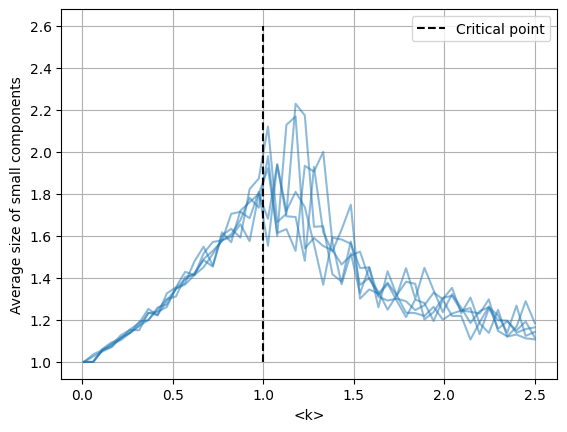

In [16]:
for i in range(5):
    plt.plot(p_space*n, sizes[i], c='tab:blue', alpha=0.5)
plt.plot([1, 1], [1, 2.6], 'k--', label='Critical point')
plt.xlabel('<k>')
plt.ylabel('Average size of small components')
plt.legend()
plt.grid()
plt.show()

Also let us see how the size of a giant component depends on the probability near the critical point.

Write a function `giant_component_size` with parameters `n` — number of nodes, `probabilities` — np.array of probabilities. The function generates a random graph for each probability and returns np.array of sizes of a giant component.

*Hint: to find nodes in a ginat component, use `max(nx.connected_components(graph), key=len)`*

In [17]:
def giant_component_size(n, probabilities):
    giant_component_sizes = []

    for p in probabilities:
        G = nx.erdos_renyi_graph(n, p)
        giant_component = max(nx.connected_components(G), key=len)
        giant_component_size = len(giant_component)
        giant_component_sizes.append(giant_component_size)

    return np.array(giant_component_sizes)

In [18]:
n = 1000
p_space = np.linspace(0.01/n, 2.5/n, 50)
sizes = []
for _ in range(5):
    size = giant_component_size(n, p_space)
    assert size.shape == (50,)
    sizes.append(size)

av_sizes = np.mean(sizes, axis=0)
assert av_sizes[0] < 20
assert 20 < av_sizes[np.argmin(np.abs(p_space*n - 1))] < 150
assert 700 < av_sizes[np.argmin(np.abs(p_space*n - 2))] < 900

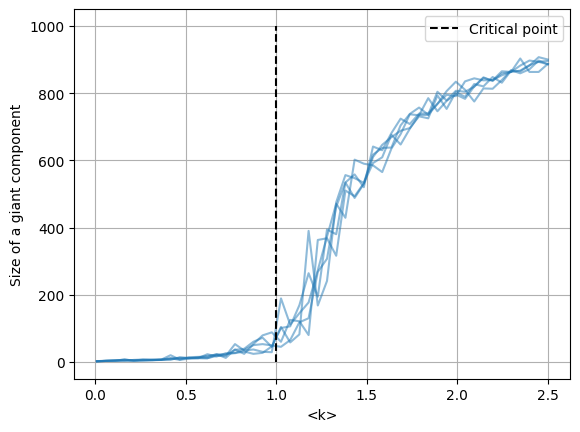

In [19]:
for i in range(5):
    plt.plot(p_space*n, sizes[i], c='tab:blue', alpha=0.5)
plt.plot([1, 1], [0, 1000], 'k--', label='Critical point')
plt.xlabel('<k>')
plt.ylabel('Size of a giant component')
plt.legend()
plt.grid()
plt.show()

### Task 4. Average path length of random networks (1 point)  -- FOR HW

In this task, we consider whether a random network is capable to model the small world phenomenon, also known as six degrees of separation — the distance between two randomly chosen nodes in a network is short. In other words, the average path length between two randomly chosen nodes increases in a growing network, but not so fast as the number of nodes.

Write a function `growing_path_len` with parameters: `av_node_degree` is an average node degree and `n_nodes` is a np.array of numbers of nodes. The function generates a random network for each number of nodes and returns a np.array of average path lengths.

*Hints:*
* *To calculate average path length, use `nx.average_shortest_path_length`*
* *Consider a giant component only*
* *To find nodes in a ginat component, use `max(nx.connected_components(graph), key=len)`*
* *To create a subgraph, use `graph.subgraph(nodes).copy()`*

In [20]:
def growing_path_len(av_node_degree, n_nodes):
    avg_path_lengths = []

    for n in n_nodes:
        p = av_node_degree / (n - 1)
        G = nx.erdos_renyi_graph(n, p)
        giant_component = max(nx.connected_components(G), key=len)
        giant_subgraph = G.subgraph(giant_component).copy()
        avg_path_length = nx.average_shortest_path_length(giant_subgraph)
        avg_path_lengths.append(avg_path_length)

    return np.array(avg_path_lengths)

In [21]:
n_nodes = np.arange(100, 1100, 100)
av_node_degree = 50
lengths = growing_path_len(av_node_degree, n_nodes)

assert lengths.shape == (10,)
assert 1.4 < lengths[0] < 1.6
assert 1.9 < lengths[5] < 1.95
assert 2 < lengths[9] < 2.1

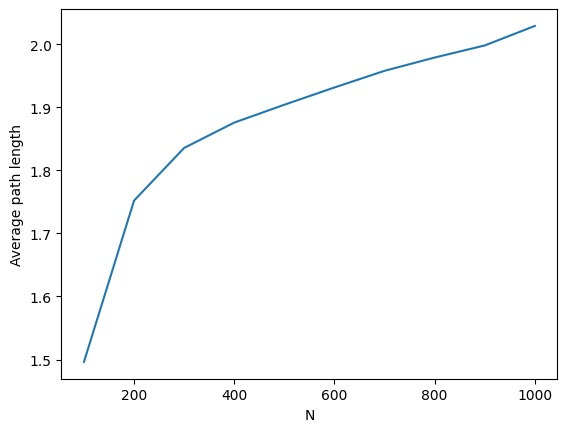

In [22]:
plt.plot(n_nodes, lengths)
plt.xlabel('N')
plt.ylabel('Average path length')
plt.show()

As we see, the small world phenomenon holds — the average path length increases at most logarithmically with respect to the number of nodes. Theoretically, the average path length $\langle d \rangle$ in a random network is

$$\langle d \rangle \approx \frac{\ln N}{\ln \langle k \rangle}$$

that corresponds to some real scale-free networks.

### Task 5. Clustering coefficients of random vs real networks (2 + 0.5 bonus points)  -- FOR HW

Clustering coefficient of a node $C_i$ contains information about relationship between nearest neighbors.  $C_i = 0$ means that there is no links between neighbors and $C_i = 1$ means that there are all possible links between them. Clustering coefficient of an Erdos-Renyi random graph is equal to the probability $p$ and does not dependent of a node and its degree:

$$C_i = \langle C \rangle = \frac{\langle k \rangle}{n} = p $$

Let us check it on generated data.

Write a function `node_degree_clustering` with parameters `n, p` — number of nodes and probability. The function generates Erdos-Renyi random graph and returns a tuple with two np.arrays: degrees and clustering coefficients. Ordering of elements should coincide: the first degree and first clustering coefficient are related to the first node and so on.

*Hint: to calculate clustering coefficients, use `nx.clustering(graph)`*

In [23]:
def node_degree_clustering(n, p):
    G = nx.erdos_renyi_graph(n, p)
    degrees = np.array([deg for _, deg in G.degree])
    clustering_coeffs = np.array(list(nx.clustering(G).values()))

    return degrees, clustering_coeffs

In [24]:
p = 0.9
n = 100
degree, clustering = node_degree_clustering(n, p)
assert degree.shape == clustering.shape
assert clustering.mean() - 3*clustering.std() < p < clustering.mean() + 3*clustering.std()
assert degree.mean() - 3*degree.std() < p * n < degree.mean() + 3*degree.std()
p = 0.1
n = 1000
degree, clustering = node_degree_clustering(n, p)
assert degree.shape == clustering.shape
assert clustering.mean() - 3*clustering.std() < p < clustering.mean() + 3*clustering.std()
assert degree.mean() - 3*degree.std() < p * n < degree.mean() + 3*degree.std()
p = 0.01
n = 3000
degree, clustering = node_degree_clustering(n, p)
assert degree.shape == clustering.shape
assert clustering.mean() - 3*clustering.std() < p < clustering.mean() + 3*clustering.std()
assert degree.mean() - 3*degree.std() < p * n < degree.mean() + 3*degree.std()

Let us draw the dependency between node degree and clustering coefficient

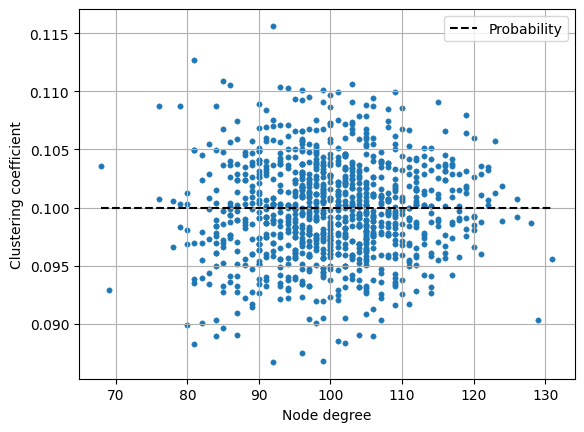

In [25]:
p = 0.1
n = 1000
degree, clustering = node_degree_clustering(n, p)
plt.scatter(degree, clustering, s=15, linewidths=0.3)
plt.plot([degree.min(), degree.max()], [p, p], 'k--', label='Probability')
plt.xlabel('Node degree')
plt.ylabel('Clustering coefficient')
plt.legend()
plt.grid()
plt.show()

Let us look at the dependency of a some real social network.

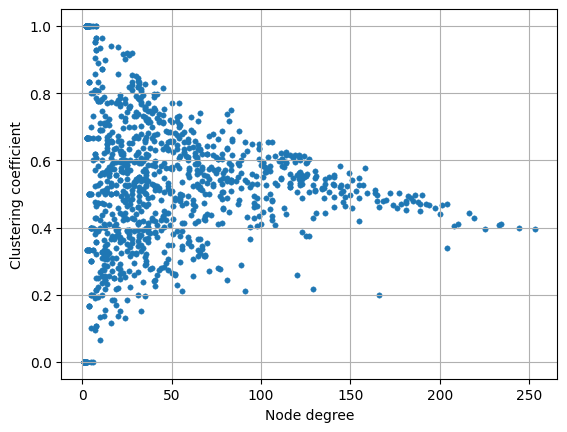

In [26]:
degree = np.loadtxt(
    'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/real_net_degree.txt'
)
clustering = np.loadtxt(
    'https://raw.githubusercontent.com/network-science-course/network-science-course/main/datasets/real_net_clustering.txt'
)
plt.scatter(degree, clustering, s=15, linewidths=0.3)
plt.xlabel('Node degree')
plt.ylabel('Clustering coefficient')
plt.grid()
plt.show()

We can see that the average clustering coefficient slightly decreases in high degrees.

### Task 6. Fitting parameters of degree distribution (1 point)

In the Erdos-Renyi model, we can estimate a degree distribution using the binomial distribution. The binomial distribution $B(n, p)$ converges to the Poisson $\text{Pois}(\lambda)$ when the number of samples $n$ tends to infinity with the fixed product $np = \lambda$.

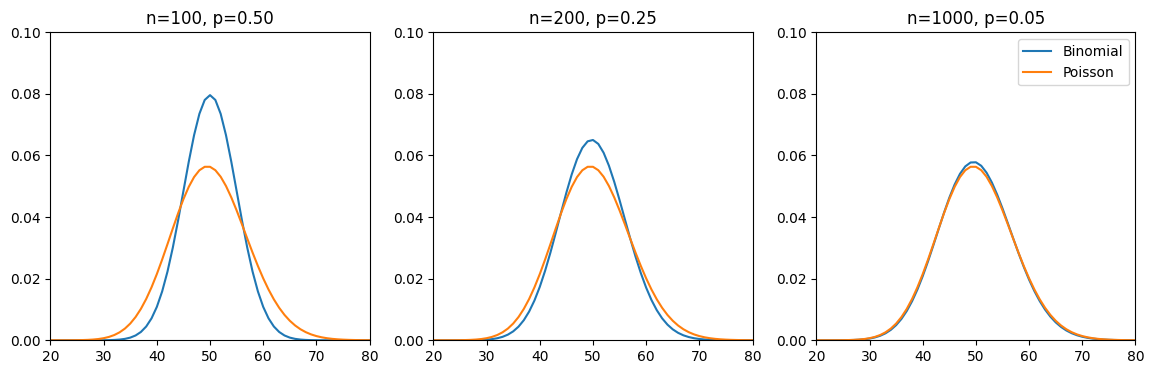

In [27]:
plt.figure(figsize=[14, 4])
for i, [n, mean] in enumerate([[100, 50], [200, 50], [1000, 50]]):
    plt.subplot(1, 3, i+1)
    plt.plot(st.binom(n, mean / n).pmf(np.arange(100)),
             label="Binomial")
    plt.plot(st.poisson(mean).pmf(np.arange(100)),
             label="Poisson")
    plt.xlim(20, 80)
    plt.ylim(0, 0.1)
    plt.title('n={}, p={:.2f}'.format(n, mean / n))
plt.legend(loc='upper right');

In this task we will estimate properties of Binomial and Poisson distributions and compare in what cases it is better to use Binomial.

Write a function `estimate_binomial` that takes a random graph and returns binomial parameters `n` and `p`.

In [30]:
def estimate_binomial(G):
    n = G.number_of_nodes()
    e = G.number_of_edges()
    if n < 2:
        return (n, 0.0)
    p = 2 * e / (n * (n - 1))
    return n, p

In [31]:
G = erdos_renyi_graph(100, 0.5)
n, p = estimate_binomial(G)
assert abs(p - 0.5) <= 0.05
assert n == 100

Write a function `estimate_poisson` that takes a random graph and returns the Poisson parameter $\lambda$ (here denoted as `m`).

In [32]:
def estimate_poisson(G):
    degrees = []
    for (node, deg) in G.degree():
      degrees.append(deg)
    if len(degrees) == 0:
        return 0
    return np.mean(degrees)

In [33]:
G = erdos_renyi_graph(1000, 0.05)
m = estimate_poisson(G)
assert abs(m - 50) <= 1

In [34]:
def plot_distribution(ax, n, p):
    G = erdos_renyi_graph(n, p)
    ax.set_title(f"n={n}, p={p}")
    degree_hist = np.array(nx.degree_histogram(G)) / len(G)
    idx = np.argwhere(degree_hist > 0)
    ax.scatter(idx, degree_hist[idx],
               c="C2", label="Empirical")
    degree_seq = np.array(list(dict(G.degree).values()))
    k_space = np.arange(degree_seq.min(), degree_seq.max())
    ax.plot(k_space,
            st.binom(*estimate_binomial(G)).pmf(k_space),
            label="Binomial")
    ax.plot(k_space,
            st.poisson(estimate_poisson(G)).pmf(k_space),
            label="Poisson")

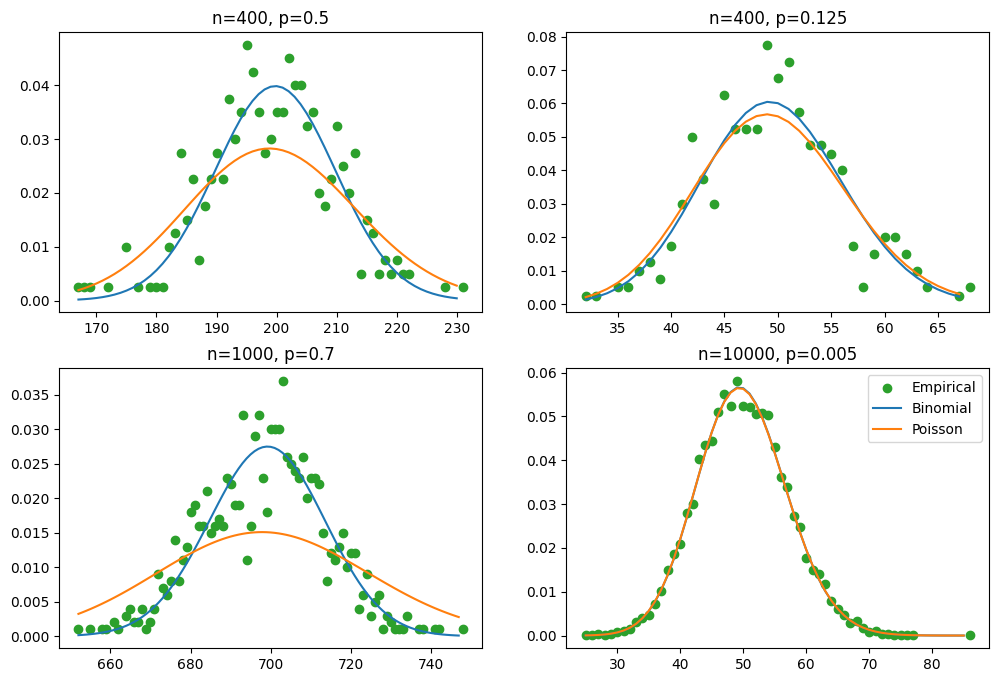

In [35]:
f = plt.figure(figsize=[12, 8])
ax = f.subplots(2, 2)
plot_distribution(ax[0][0], 400, 0.5)
plot_distribution(ax[0][1], 400, 0.125)
plot_distribution(ax[1][0], 1000, 0.7)
plot_distribution(ax[1][1], 10000, 0.005)
plt.legend();

In sparse network it's better to use Poisson distribution (right figuers). But in Dense network it better way to use Binomial distribution (left figuers).

### Task 7. Snobbish Networks (2 + 0.5 bonus points) -- FOR HW

Consider a network of $N$ red and $N$ blue nodes. The probability that there is a link between nodes of identical color is $p$ and the probability that there is a link between nodes of different color is $q$. A network is snobbish if $p>q$, capturing a tendency to connect to nodes of the same color. For $q = 0$ the network has at least two components, containing nodes with the same color.

Write a function `snobbish_network` that takes the number of red (or blue) nodes `n`, probability of link between nodes of the same color `p` and probability of link between nodes of different color `q`. The function returns a network with $2N$ nodes where every node has an attribute `color` that can be `blue` or `red`.

*Hint: to set node attributes, use `nx.set_node_attributes`*

In [43]:
import random

def snobbish_network(n, p, q):
    G = nx.Graph()

    G.add_nodes_from(range(n), color='red')
    G.add_nodes_from(range(n, n * 2), color='blue')

    for i in range(n):
        for j in range(i + 1, n):
            if random.random() < p:
                G.add_edge(i, j)
                G.add_edge(i + n, j + n)

    for i in range(n):
        for j in range(n, n * 2):
            if random.random() < q:
                G.add_edge(i, j)

    return G

In [44]:
sn_net = snobbish_network(100, 0.1, 0.01)
assert sn_net.number_of_nodes() == 200
assert set(nx.get_node_attributes(sn_net, 'color').values()) == {'blue', 'red'}
assert np.sum(np.array(list(nx.get_node_attributes(sn_net, 'color').values())) == 'red') == 100
assert 0.76 < nx.attribute_assortativity_coefficient(sn_net, 'color') < 0.88
sn_net = snobbish_network(200, 0.1, 0.05)
assert 0.25 < nx.attribute_assortativity_coefficient(sn_net, 'color') < 0.4

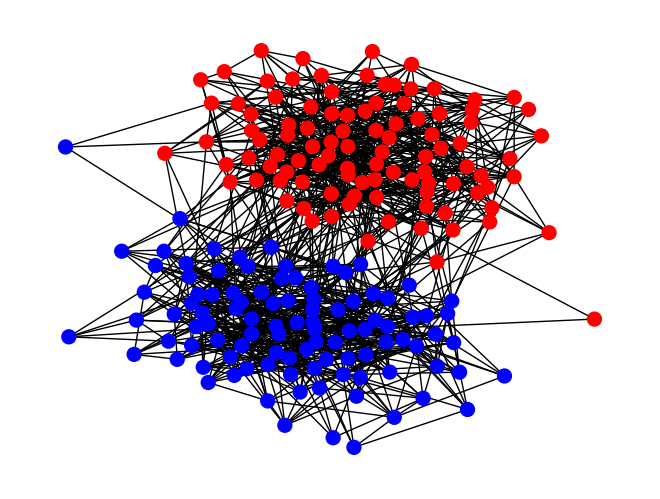

In [45]:
sn_net = snobbish_network(100, 0.1, 0.01)
nx.draw(sn_net,
        node_color=nx.get_node_attributes(sn_net, 'color').values(),
        node_size=100)